## Sphere Comparison

OSError: simulations/Spectrum_mie_20nmsph not found.

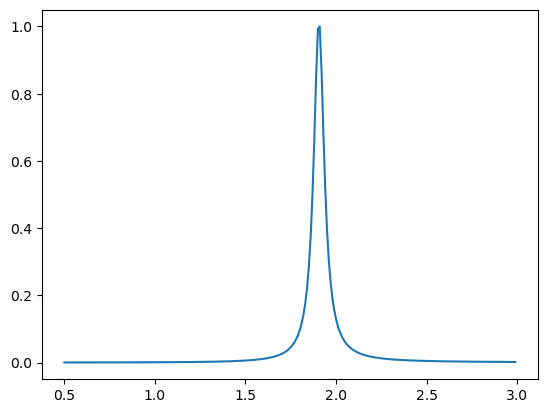

In [2]:
from coupled_harmonic_osc import CoupledOscillators
import numpy as np
import matplotlib.pyplot as plt

def constants():
    # These constants are defined for fitting Drude to JC
    wp = 9. # eV, bulk plasma frequency 
    eps_inf = 9.7 # [unitless], static dielectric response of ionic background 
    gamNR_qs = 0.073 # non-radiative Drude damping [eV]
    eps_b = 1.0**2 # background dielectric constant
    return np.array([wp, eps_inf, gamNR_qs, eps_b])

radii = 20
coupled_dip = CoupledOscillators(constants(), # drude constants 
                                 1, # number of particles
                                 1, # dipoles per particle
                                 np.array([[0, 0]]), # particle centers
                                 np.array([[1, 0]]), # dipole orientations
                                 np.array([int(radii)*1.E-7]), # radii
                                 np.array([1, 1]), # kind
                                 5E-7)
final_eigvals, final_eigvecs = coupled_dip.iterate()
# coupled_dip.see_vectors(final_eigvals, final_eigvecs)

w0, m, gamNR = coupled_dip.dipole_parameters()

e = 4.80326E-10 #statC
c = 2.998E+10 #cm/s
hbar_eVs = 6.58212E-16 #eV*s
hbar_cgs = 1.0545716E-27 

w = np.arange(.5, 3, .01)

def alpha(w):
    gamR = 2.*e**2*(w)**2/(3.*m*c**3)/hbar_eVs
    gamTot = gamNR + gamR
    return e**2/m * hbar_eVs**2 / (- w**2 - 1j*gamTot*w + w0**2)

def ext_cross(w):
    return 4.*np.pi*w/c*np.imag(alpha(w=w))

Cext = ext_cross(w=w)
plt.plot(w, ext_cross(w=w)/max(Cext), label='analytic')

data = np.loadtxt(str('simulations/Spectrum_mie_')+str(radii)+str('nmsph'),skiprows=1)
wave = data[:,0]
ext = data[:,1]
plt.plot(wave, ext/max(ext), label='sim')


idx = np.where(ext==max(ext))
print(radii*2, str('nm diameter sphere'))
print(str('Eval:'), np.round(np.real(final_eigvals)[0], 2), str('eV'))
print(str('Resonance:'), wave[idx][0], str('eV'))
plt.xlabel('x [eV]')
plt.xlim([0.5, 2.5])
plt.legend()
plt.show()

## Look at drude data

In [ ]:
drude_data = np.loadtxt('/Users/clairewest/werk/research/MNPBEM17/Material/@epstable/drude.dat',skiprows=2)
ev = drude_data[:,0]
n = drude_data[:,1]
k = drude_data[:,2]

jc_data = np.loadtxt('/Users/clairewest/werk/research/MNPBEM17/Material/@epstable/gold.dat',skiprows=2)
ev = drude_data[:,0]
n = drude_data[:,1]
k = drude_data[:,2]

plt.plot(drude_data[:,0], drude_data[:,1])
plt.plot(drude_data[:,0], drude_data[:,2])

plt.plot(jc_data[:,0], jc_data[:,1], '--', c='tab:blue', label='n jc')
plt.plot(jc_data[:,0], jc_data[:,2], '--', c='tab:orange',label='k jc')
plt.legend()
plt.xlim([0.5, 4])
plt.show()
print(min(ev))


## Prolate spheroid comparison


200 nm length rod
Eval: 1.85 eV
Resonance: 1.862 eV


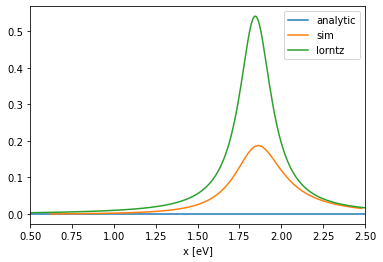

In [2]:
def constants():
    # These constants are defined for fitting Drude to JC
    wp = 9. # eV, bulk plasma frequency 
    eps_inf = 9.7 # [unitless], static dielectric response of ionic background 
    gamNR_qs = 0.073 # non-radiative Drude damping [eV]
    eps_b = 1.**2 # background dielectric constant
    return np.array([wp, eps_inf, gamNR_qs, eps_b])

radii = 100
coupled_dip = CoupledOscillators(constants(), # drude constants 
                                 1, # number of particles
                                 1, # dipoles per particle
                                 np.array([[0, 0]]), # particle centers
                                 np.array([[1, 0]]), # dipole orientations
                                 np.array([int(radii)*1.E-7]), # radii
                                 np.array([1]), # kind
                                 40E-7)
final_eigvals, final_eigvecs = coupled_dip.iterate()
# coupled_dip.see_vectors(final_eigvals, final_eigvecs)

def lorentz(w, w0, gam):
    return np.imag(2*gam/(w0**2-w**2-1j*gam*2*w))

w0, m, gamNR = coupled_dip.dipole_parameters()

e = 4.80326E-10 #statC
c = 2.998E+10 #cm/s
hbar_eVs = 6.58212E-16 #eV*s
hbar_cgs = 1.0545716E-27 

w = np.arange(.5, 3, .01)

def alpha(w):
    gamR = 2.*e**2*(w)**2/(3.*m*c**3)/hbar_eVs
    gamTot = gamNR + gamR
    return e**2/m * hbar_eVs**2 / (- w**2 - 1j*gamTot*w + w0**2)

def ext_cross(w):
    return 4.*np.pi*w/c*np.imag(alpha(w=w))

Cext = ext_cross(w=w)
plt.plot(w, ext_cross(w=w), label='analytic')

data = np.loadtxt(str('Spectrum_40_')+str(radii),skiprows=1)
wave = data[:,0]
ext = data[:,1]
plt.plot(wave, ext, label='sim')

lorntz = lorentz(w=w, w0=np.real(final_eigvals[0]), gam=np.imag(final_eigvals[0]))
plt.plot(w, lorntz, label='lorntz')



idx = np.where(ext==max(ext))
print(radii*2, str('nm length rod'))
print(str('Eval:'), np.round(np.real(final_eigvals)[0], 2), str('eV'))
print(str('Resonance:'), wave[idx][0], str('eV'))
plt.xlabel('x [eV]')
plt.xlim([0.5, 2.5])
plt.legend()
plt.show()

## Prolate dimer analysis

In [3]:
def constants():
    # These constants are defined for fitting Drude to JC
    wp = 9. # eV, bulk plasma frequency 
    eps_inf = 9.7 # [unitless], static dielectric response of ionic background 
    gamNR_qs = 0.073 # non-radiative Drude damping [eV]
    eps_b = 1.**2 # background dielectric constant
    return np.array([wp, eps_inf, gamNR_qs, eps_b]
                    
                    

SyntaxError: unexpected EOF while parsing (<ipython-input-3-f70002f87dbe>, line 9)

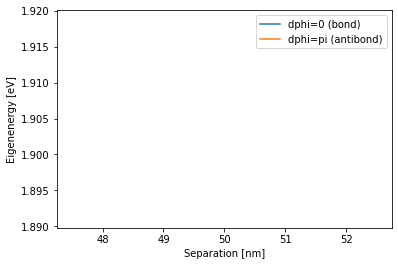

[1.8911547497615135]
[1.918684008953632]


In [4]:
radii1 = 20; radii2 = radii1
bonding = []
antibonding = []
change_sep = []

for raster in range(50, 60, 10):
    sep = raster*1E-7
    coupled_dip = CoupledOscillators(constants(), # drude constants 
                                 2, # number of particles
                                 1, # dipoles per particle
                                 np.array([[-sep/2, 0], [sep/2, 0]]), # particle centers
                                 np.array([[1, 0], [1, 0]]), # dipole orientations
                                 np.array([int(radii1)*1.E-7, int(radii2)*1.E-7]), # radii
                                 np.array([1, 1]), # kind
                                 5E-7)
    final_eigvals, final_eigvecs = coupled_dip.iterate()
    en0 = np.real(final_eigvals[0])
    en1 = np.real(final_eigvals[1])
    v0 = final_eigvecs[:,0] # [unitless]
    phi0 = np.arctan2(np.imag(v0), np.real(v0))
    dphi0 = np.abs(np.diff(phi0))
    v1 = final_eigvecs[:,1] # [unitless]
    phi1 = np.arctan2(np.imag(v1), np.real(v1))
    dphi1 = np.abs(np.diff(phi1))
    
    if (np.round(dphi0, 2)[0]) == (np.round(dphi1, 2)[0]): continue
    if (np.round(dphi0, 2)[0]) == 3.14:
        antibonding.append(en0) 
        
    if (np.round(dphi1, 2)[0]) == 3.14:
        antibonding.append(en1)         
        
    if (np.round(dphi0, 2)[0]) == 0:
        bonding.append(en0) 
        
    if (np.round(dphi1, 2)[0]) == 0:
        bonding.append(en1)    
        
    change_sep.append(raster)
#     coupled_dip.see_vectors(final_eigvals, final_eigvecs)
#     plt.show()

plt.plot(change_sep, bonding, label='dphi=0 (bond)')
plt.plot(change_sep, antibonding, label='dphi=pi (antibond)')
plt.xlabel('Separation [nm]')
plt.ylabel('Eigenenergy [eV]')
plt.legend()
plt.show()

# print(max(np.asarray(bonding)-np.asarray(antibonding)))
print(bonding)
print(antibonding)

[]


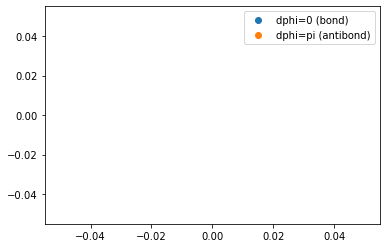

In [5]:
start = 1; end = 200
shortened_sep = change_sep[start:end]
shortened_bond = bonding[start:end]
shortened_anti = antibonding[start:end]

plt.plot(shortened_sep, shortened_bond,'o', label='dphi=0 (bond)')
plt.plot(shortened_sep, shortened_anti,'o', label='dphi=pi (antibond)')


diff_func = np.asarray(shortened_bond)-np.asarray(shortened_anti)
idx = np.where((np.round(diff_func,4) == 0))
crossings = np.asarray(shortened_sep)[idx]
print(crossings)
# for i in range(0, len(crossings)):
#     plt.plot([crossings[i], crossings[i]], [min(shortened_bond), max(shortened_anti)], color='black')
plt.legend()

# first crossing at 230 nm
# period = 260 nm
plt.show()

## Reproduce trend with BEM

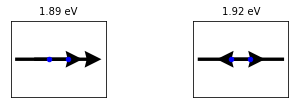

325.3773266890562


In [6]:
radii1 = 20; radii2 = radii1
bonding = []
antibonding = []
change_sep = []

gap = 50
sep = gap*1E-7
coupled_dip = CoupledOscillators(constants(), # drude constants 
                     2, # number of particles
                     1, # dipoles per particle
                     np.array([[-sep/2, 0], [sep/2, 0]]), # particle centers
                     np.array([[1, 0], [1, 0]]), # dipole orientations
                     np.array([int(radii1)*1.E-7, int(radii2)*1.E-7]), # radii
                     np.array([1, 1]), # kind
                     5E-7)
final_eigvals, final_eigvecs = coupled_dip.iterate()
en0 = np.real(final_eigvals[0])
en1 = np.real(final_eigvals[1])
v0 = final_eigvecs[:,0] # [unitless]
phi0 = np.arctan2(np.imag(v0), np.real(v0))
dphi0 = np.abs(np.diff(phi0))
v1 = final_eigvecs[:,1] # [unitless]
phi1 = np.arctan2(np.imag(v1), np.real(v1))
dphi1 = np.abs(np.diff(phi1))

if (np.round(dphi0, 2)[0]) == (np.round(dphi1, 2)[0]): pass#continue
if (np.round(dphi0, 2)[0]) == 3.14:
    antibonding.append(en0) 

if (np.round(dphi1, 2)[0]) == 3.14:
    antibonding.append(en1)         

if (np.round(dphi0, 2)[0]) == 0:
    bonding.append(en0) 

if (np.round(dphi1, 2)[0]) == 0:
    bonding.append(en1)    
        
change_sep.append(gap)
coupled_dip.see_vectors(final_eigvals, final_eigvecs)
w0, m, gamNR = coupled_dip.dipole_parameters()
plt.show()


print(1240/(w0[0])/2)

0
4
5
6
7


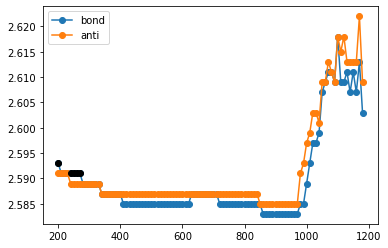

In [7]:
radii=25

bonding = []
antibonding = []
change_sep = []

for i in range(200, 1190, 10):
    gap=i
    data = np.loadtxt(str('Spectrum_eels_')+str(radii)+str('nmsph_gap')+str(gap),skiprows=1)
#     plt.plot(data[:,0], data[:,1]/max( data[:,1]), label='bond sim')
#     plt.plot(data[:,0], data[:,2]/max( data[:,2]), label='anti sim')
#     plt.legend()
#     plt.title(gap)
#     plt.show()
    idx_b = np.where(data[:,1] == max(data[:,1]))
    w_b = data[idx_b,0][0][0]
    idx_ab = np.where(data[:,2] == max(data[:,2]))
    w_ab = data[idx_ab,0][0][0]
    bonding.append(w_b)         
    antibonding.append(w_ab)  
    change_sep.append(i)         
    
# print(bonding)    
    
plt.plot(change_sep,  bonding, '-o',label='bond')
plt.plot(change_sep,  antibonding,'-o', label='anti')
plt.legend()
# print(np.asarray(bonding)-np.asarray(antibonding))
for i in range(0, len(bonding)):
    if bonding[i]-antibonding[i] > 0:
        plt.plot(change_sep[i], bonding[i], 'ko')
        print(i)


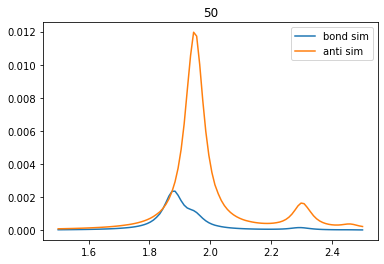

1.884 1.945


In [15]:
radii1=5; radii2 = 20

bonding = []
antibonding = []
change_sep = []

for i in range(50, 60, 10):
    gap=i
    data = np.loadtxt(str('Spectrum_eels_')+str(radii1)+str('-')+str(radii2)+str('ellipsoid_gap')+str(gap),skiprows=1)
    plt.plot(data[:,0], data[:,1], label='bond sim')
    plt.plot(data[:,0], data[:,2], label='anti sim')
    plt.legend()
    plt.title(gap)
    plt.show()
    idx_b = np.where(data[:,1] == max(data[:,1]))
    w_b = data[idx_b,0][0][0]
    idx_ab = np.where(data[:,2] == max(data[:,2]))
    w_ab = data[idx_ab,0][0][0]
    bonding.append(w_b)         
    antibonding.append(w_ab)  
    change_sep.append(i)         
    
# print(bonding)    
    
# plt.plot(change_sep,  bonding, '-o',label='bond')
# plt.plot(change_sep,  antibonding,'-o', label='anti')
# plt.legend()
# print(np.asarray(bonding)-np.asarray(antibonding))
# for i in range(0, len(bonding)):
#     if bonding[i]-antibonding[i] > 0:
#         plt.plot(change_sep[i], bonding[i], 'ko')
#         print(i)
print(max(bonding), max(antibonding))